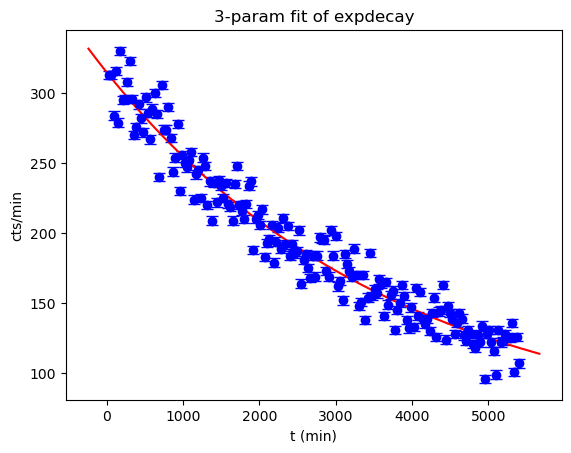

DATA SET: 180 points
FITTING FUNCTION: expdecay, 3 variable parameters
Chi-squared = 3.422e+03  Reduced chi-squared = 19.33
Parameters and 2-sigma parameter uncertainties:
        n0 = 259.04      +/- 23.476     
       tau = 3786.3      +/- 761.33     
        bb = 55.873      +/- 27.265     


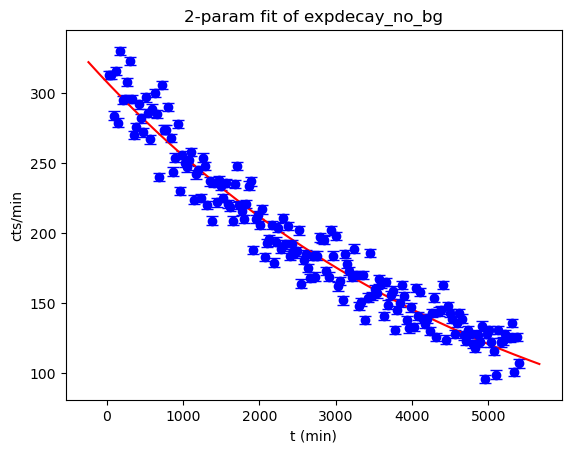

DATA SET: 180 points
FITTING FUNCTION: expdecay_no_bg, 2 variable parameters
Chi-squared = 3.588e+03  Reduced chi-squared = 20.16
Parameters and 2-sigma parameter uncertainties:
        n0 = 308.04      +/- 5.0793     
       tau = 5337.3      +/- 200.9      


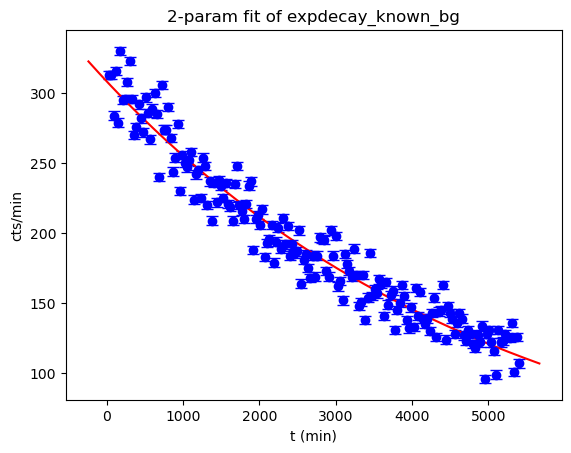

DATA SET: 180 points
FITTING FUNCTION: expdecay_known_bg, 2 variable parameters
Chi-squared = 3.571e+03  Reduced chi-squared = 20.06
Parameters and 2-sigma parameter uncertainties:
        n0 = 304.39      +/- 5.0901     
       tau = 5224.5      +/- 196.58     


In [47]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


data = """
30	313
60	313
90	284
120	316
150	279
180	330
210	295
240	296
270	308
300	323
330	296
360	270
390	276
420	292
450	282
480	272
510	297
540	286
570	267
600	289
630	300
660	285
690	240
720	306
750	274
780	274
810	290
840	268
870	244
900	254
930	278
960	230
990	256
1020	250
1050	247
1080	252
1110	258
1140	224
1170	242
1200	245
1230	225
1260	254
1290	248
1320	220
1350	237
1380	209
1410	236
1440	222
1470	238
1500	234
1530	225
1560	236
1590	221
1620	219
1650	209
1680	235
1710	248
1740	220
1770	216
1800	210
1830	221
1860	234
1890	237
1920	188
1950	210
1980	213
2010	206
2040	217
2070	183
2100	193
2130	196
2160	206
2190	179
2220	194
2250	204
2280	189
2310	211
2340	192
2370	205
2400	184
2430	192
2460	185
2490	187
2520	202
2550	164
2580	181
2610	185
2640	175
2670	168
2700	184
2730	169
2760	184
2790	197
2820	196
2850	195
2880	173
2910	169
2940	202
2970	184
3000	198
3030	162
3060	166
3090	152
3120	185
3150	178
3180	173
3210	169
3240	189
3270	170
3300	148
3330	151
3360	170
3390	138
3420	154
3450	186
3480	155
3510	160
3540	157
3570	167
3600	164
3630	141
3660	165
3690	149
3720	156
3750	159
3780	131
3810	145
3840	150
3870	163
3900	155
3930	138
3960	132
3990	147
4020	133
4050	161
4080	141
4110	158
4140	139
4170	135
4200	139
4230	130
4260	143
4290	154
4320	126
4350	144
4380	145
4410	163
4440	124
4470	148
4500	143
4530	139
4560	128
4590	136
4620	143
4650	139
4680	127
4710	123
4740	131
4770	128
4800	121
4830	118
4860	127
4890	122
4920	134
4950	96
4980	128
5010	131
5040	122
5070	116
5100	99
5130	131
5160	122
5190	123
5220	128
5250	126
5280	125
5310	136
5340	101
5370	126
5400	107
"""

vals = np.fromstring(data,dtype=int,sep=' ').reshape(-1,2)

x_data = vals[:, 0]
y_data = vals[:, 1]

#coefficients = np.polyfit(x_data, np.log(y_data), 1,w=np.sqrt(y_data))

"""
def exponential_func(x, a,b):
    return a * np.exp(-x/b)

# Fit the exponential function to the data
popt, pcov = curve_fit(exponential_func, x_data, y_data)

# Get the fitted parameters
a_fit,b_fit = popt

print("Fitted Parameters:")
print("a:", a_fit)
print("b:", b_fit)
"""


"""
#sci_fit = curve_fit(lambda t,a,b: a*np.exp(b*t),  x_data,  y_data, p0=(30,313))
#scipy.optimize.curve_fit(lambda t,a,b: a*numpy.exp(b*t),  x,  y,  p0=(4, 0.1))

# Extract the coefficients
a, b = coefficients

print("Fitted Parameters:")
print("a:", a)
print("b:", b)


#print(sci_fit)
"""


from dfit import Dfit
def expdecay(t,n0,tau,bb):
    """Model function: exponential decay plus background"""
    return n0*np.exp(-t/tau)+bb

def expdecay_no_bg(t,n0,tau):
    return n0*np.exp(-t/tau)
#efit = Dfit(expdecay,tdat,ndat,yerrs=sigdat,p0s=[200,50])
#efit.printfit()

bg_known = 4.0333
def expdecay_known_bg(t,n0,tau):
    return n0*np.exp(-t/tau)+bg_known

# estimating unccertainty in counts to be +-3
y_err = np.full(len(y_data),3)

# doing fit with fitting bg
efit = Dfit(expdecay,x_data,y_data,yerrs=y_err,p0s=[30,300])
efit.plotfit(xlabel='t (min)',ylabel='cts/min')
efit.printfit()

# doing fit with no BG
efit = Dfit(expdecay_no_bg,x_data,y_data,yerrs=y_err,p0s=[30,300])
efit.plotfit(xlabel='t (min)',ylabel='cts/min')
efit.printfit()

# doing fit with known BG
# BG Value and uncertainty 4.033333333	0.4082013627
efit = Dfit(expdecay_known_bg,x_data,y_data,yerrs=y_err,p0s=[30,300])
efit.plotfit(xlabel='t (min)',ylabel='cts/min')
efit.printfit()




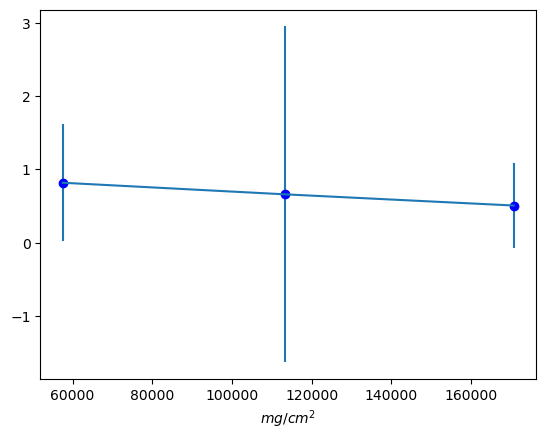

[-2.74142491e-06  9.73529672e-01]


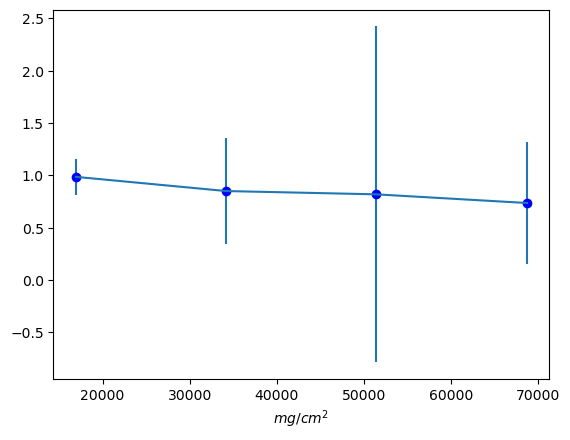

[-4.52744829e-06  1.04062866e+00]


In [63]:

bg_rate = 33
bg_rate_sigma = 1.77

no_absorb = 346.75
no_absorb_sigma = 8.61
no_absorb-=bg_rate
no_absorb_sigma+=bg_rate_sigma


# copper density = 8.96 g/cm^3 so 
cu_d = 8.96*1000 # in mg/cm^3
copper_thick = np.array([6.42,12.638,19.053]) # this is x-axis
copper_thick *= cu_d
copper_data = np.array([289.5,240,192.125])
copper_sigma = np.array([6.5,22,4.278])
copper_data-=bg_rate
copper_sigma+=bg_rate_sigma


ax = plt.axes()
ax.errorbar(copper_thick,copper_data/no_absorb,yerr=copper_sigma/no_absorb_sigma)
plt.plot(copper_thick,copper_data/no_absorb, 'bo')
plt.xlabel('$mg/cm^2$')
plt.show()

# now fit this relationship
coefficients = np.polyfit(copper_thick, copper_data/no_absorb, 1)
print(coefficients)



## now the same thing for aluminum

# copper density = 8.96 g/cm^3 so 
al_d = 2.7*1000 # in mg/cm^3
al_thick = np.array([6.28,12.66,19.02,25.45]) # this is x-axis
al_thick_sigma = np.array([0.02,0.04,0.06,0.08])
al_thick *= al_d
al_thick_sigma*=al_d
al_data = np.array([342,299.5,289.6666667,263.625])
al_sigma = np.array([0,3.5,14.9033926,4.271740612])
al_data-=bg_rate
al_sigma+=bg_rate_sigma


ax = plt.axes()
ax.errorbar(al_thick,al_data/no_absorb,yerr=al_sigma/no_absorb_sigma)
plt.plot(al_thick,al_data/no_absorb, 'bo')
plt.xlabel('$mg/cm^2$')
plt.show()

# now fit this relationship
coefficients = np.polyfit(al_thick, al_data/no_absorb, 1)
print(coefficients)